In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

warnings.simplefilter(action="ignore", category=Warning)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Analysis

In [14]:
# İmport işlemi yapılırken hata verebilir bu kısmı veriniz bilgisayarda hangi konumdaysa ona göre tekrardan yazın

In [15]:
dataframe = pd.read_csv("train.csv")
dataframe_test = pd.read_csv("test.csv")

all_data = [dataframe, dataframe_test]

In [16]:
# Veri setine genel bakış

In [29]:
print("#"*20, " Shape ", "#"*20)
print(dataframe.shape)
print("#"*20, " Types ", "#"*20)
print(dataframe.dtypes)
print("#"*20, " Head ", "#"*20)
print(dataframe.head())
print("#"*20, " Tail ", "#"*20)
print(dataframe.tail())
print("#"*20, " NA ", "#"*20)


####################  Shape  ####################
(891, 12)
####################  Types  ####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
####################  Head  ####################
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex    Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1   
2                             Heikkinen, Miss. Laina  female 26.000      0   
3       Futrelle, Mrs.

In [ ]:
# Değişken analizi

In [30]:
# Değişkenlerin saklanması
cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes != "O"]
    
cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and dataframe[col].dtypes == "O"]
    
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
# num_cols
num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
num_cols = [col for col in num_cols if col not in num_but_cat]
    
cols = [dataframe.columns]
print(f'Observations: {dataframe.shape[0]}')
print(f'Variables: {dataframe.shape[1]}')
print(f'cat_cols: {len(cat_cols)} col names: {cat_cols}')
print(f'num_cols: {len(num_cols)} col names: {num_cols}')
print(f'cat_but_car: {len(cat_but_car)} col names: {cat_but_car}')
print(f'num_but_cat: {len(num_but_cat)} col names: {num_but_cat}')

Observations: 891
Variables: 12
cat_cols: 6 col names: ['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']
num_cols: 3 col names: ['PassengerId', 'Age', 'Fare']
cat_but_car: 3 col names: ['Name', 'Ticket', 'Cabin']
num_but_cat: 4 col names: ['Survived', 'Pclass', 'SibSp', 'Parch']


In [ ]:
# Kategorik değişkenlerin analizi

In [31]:
for col_name in dataframe[cat_cols]:
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#"*20)

        Sex  Ratio
Sex               
male    577 64.759
female  314 35.241
####################
          Embarked  Ratio
Embarked                 
S              644 72.278
C              168 18.855
Q               77  8.642
####################
          Survived  Ratio
Survived                 
0              549 61.616
1              342 38.384
####################
        Pclass  Ratio
Pclass               
3          491 55.107
1          216 24.242
2          184 20.651
####################
       SibSp  Ratio
SibSp              
0        608 68.238
1        209 23.457
2         28  3.143
4         18  2.020
3         16  1.796
8          7  0.786
5          5  0.561
####################
       Parch  Ratio
Parch              
0        678 76.094
1        118 13.244
2         80  8.979
5          5  0.561
3          5  0.561
4          4  0.449
6          1  0.112
####################


In [ ]:
# Sayısal değişkenlerin describe ile incelenmesi

In [32]:
dataframe[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


In [ ]:
# 0 olan değerlerin saptanması

In [33]:
zero_counts = pd.DataFrame(dataframe[num_cols].apply(lambda col: (col == 0).sum()), columns=["zero_counts"]).iloc[1:6]
zero_counts

,zero_counts
Age,0
Fare,15


In [ ]:
# Sayısal değişkenlerin analizi

              count    mean     std   min     5%    10%     20%     30%  \
PassengerId 891.000 446.000 257.354 1.000 45.500 90.000 179.000 268.000   

                40%     50%     60%     70%     90%     95%     99%     max  
PassengerId 357.000 446.000 535.000 624.000 802.000 846.500 882.100 891.000  


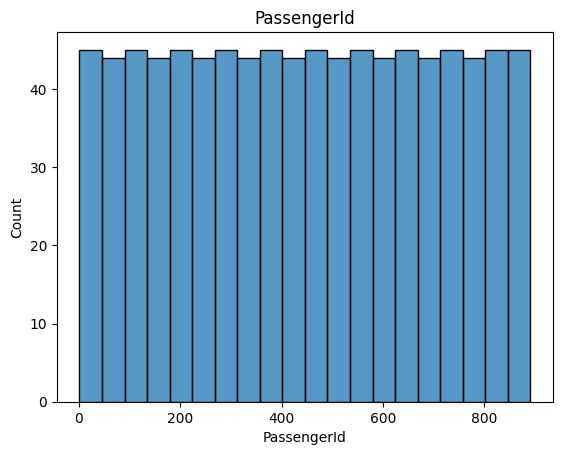

      count   mean    std   min    5%    10%    20%    30%    40%    50%  \
Age 714.000 29.699 14.526 0.420 4.000 14.000 19.000 22.000 25.000 28.000   

       60%    70%    90%    95%    99%    max  
Age 31.800 36.000 50.000 56.000 65.870 80.000  


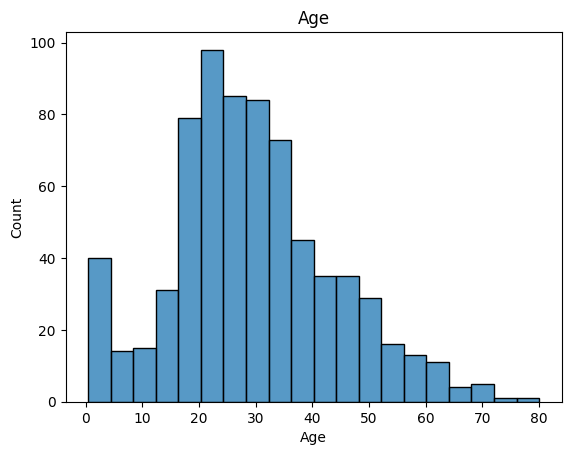

       count   mean    std   min    5%   10%   20%   30%    40%    50%    60%  \
Fare 891.000 32.204 49.693 0.000 7.225 7.550 7.854 8.050 10.500 14.454 21.679   

        70%    90%     95%     99%     max  
Fare 27.000 77.958 112.079 249.006 512.329  


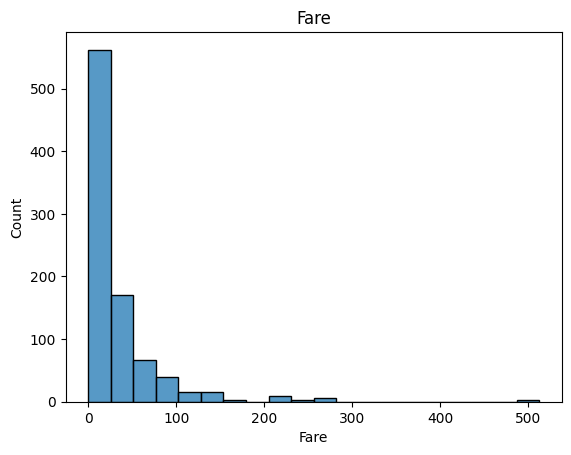

In [34]:
for col_name in dataframe[num_cols]:
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.90, 0.95, 0.99]
    print(pd.DataFrame(dataframe[col_name].describe(quantiles)).T)
    
    g = sns.histplot(x=dataframe[col_name],
                        data=dataframe,
                        bins=20)
    g.set_title(col_name)
    g.set(xlabel=col_name)
    plt.show()

In [ ]:
# Outlier analizi

In [35]:
q1 = 0.01
q3 = 0.99
for col_name in dataframe[num_cols]:
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + interquartile_range * 1.5
    low_limit = quartile1 - interquartile_range * 1.5
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        print({col_name}, ": Outlier var")
    else:
        print({col_name}, ": Outlier yok")

{'PassengerId'} : Outlier yok
{'Age'} : Outlier yok
{'Fare'} : Outlier yok


In [ ]:
# Hedef değişken ve korelasyon analizi

In [36]:
# Nümerik değişkenlerin target'a göre ortalamaları
for numerical_col in num_cols:    
    print(dataframe.groupby("Survived").agg({numerical_col: "mean"}), end="\n\n\n")
print("#"*50, "\n\n")
for categorical_col in cat_cols:
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)["Survived"].mean()}), end="\n\n\n")

          PassengerId
Survived             
0             447.016
1             444.368


            Age
Survived       
0        30.626
1        28.344


           Fare
Survived       
0        22.118
1        48.395


################################################## 


        TARGET_MEAN
Sex                
female        0.742
male          0.189


          TARGET_MEAN
Embarked             
C               0.554
Q               0.390
S               0.337


          TARGET_MEAN
Survived             
0               0.000
1               1.000


        TARGET_MEAN
Pclass             
1             0.630
2             0.473
3             0.242


       TARGET_MEAN
SibSp             
0            0.345
1            0.536
2            0.464
3            0.250
4            0.167
5            0.000
8            0.000


       TARGET_MEAN
Parch             
0            0.344
1            0.551
2            0.500
3            0.600
4            0.000
5            0.200
6            

In [ ]:
# Korelasyon analizi

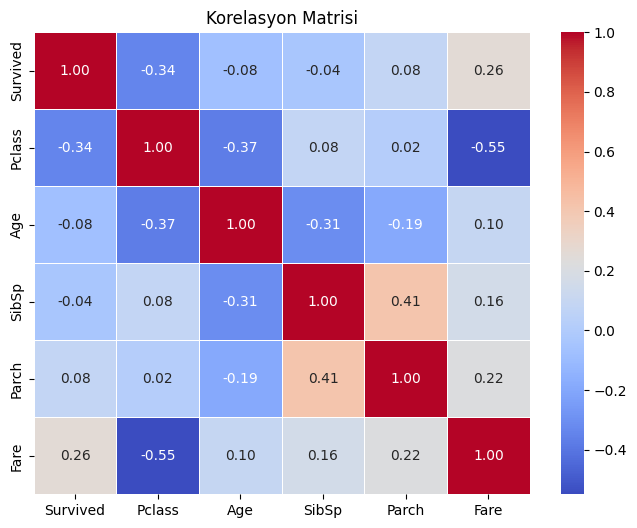

In [39]:
#Sayısal değişkenlerin heatmap ile korelasyon grafiğinin oluşturulması
liste_1=dataframe[["Survived","Pclass","Age","SibSp","Parch","Fare"]]
correlation_matrix = liste_1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

In [ ]:
# Fare x Pclass korelasyonu yüksek sayılabilir

# Feature Engineering

In [40]:
#Null değerler train dosyasında var mı diye sorguluyorum.
dataframe.isnull().values.any()

True

In [41]:
dataframe_test.isnull().values.any()

True

In [42]:
#Null(eksik) değerlerin sayısını bulma.
dataframe.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [43]:
dataframe_test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [44]:
#dataframe(train dosyası).
print(f'The percent of NaN in the Cabin column is: {dataframe["Cabin"].isnull().sum() / dataframe.shape[0]* 100}')
print(f'The percent of NaN in the Age column is: {dataframe["Age"].isnull().sum() / dataframe.shape[0]* 100}')
print(f'The percent of NaN in the Embarked column is: {dataframe["Embarked"].isnull().sum() / dataframe.shape[0]* 100}')

The percent of NaN in the Cabin column is: 77.10437710437711
The percent of NaN in the Age column is: 19.865319865319865
The percent of NaN in the Embarked column is: 0.22446689113355783


In [45]:
print(f'The percent of NaN in the Cabin column is: {dataframe_test["Cabin"].isnull().sum() / dataframe_test.shape[0]* 100}')
print(f'The percent of NaN in the Age column is: {dataframe_test["Age"].isnull().sum() / dataframe_test.shape[0]* 100}')

The percent of NaN in the Cabin column is: 78.22966507177034
The percent of NaN in the Age column is: 20.574162679425836


In [46]:
dataframe["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [47]:
#mode özelliğini kullanarak 2 eksik veriyi doldurduk.
mode_embarked = dataframe['Embarked'].mode()[0]
dataframe['Embarked'].fillna(mode_embarked, inplace=True)

In [48]:
dataframe.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [49]:
#Age sütunundaki eksik verileri doldurmak için mean özelliğini kullandık.
#Bunu ise Age sütununun ortalamasını (Mean) alarak yaptık.
dataframe["Age"].fillna(dataframe["Age"].mean(),inplace=True)
dataframe_test["Age"].fillna(dataframe_test["Age"].mean(),inplace=True)

In [50]:
dataframe["Age"].isnull().sum()

0

In [51]:
#Age sütunundaki eksik verileri doldurduk ve age sütunun da hiç eksik veri kalmadı.
dataframe.isnull().sum().sort_values(ascending=False)

Cabin          687
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [52]:
dataframe_test.isnull().sum().sort_values(ascending=False)

Cabin          327
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [53]:
#Eğer bir sütundaki boş değer sayısı veri setinin %30 - %40´ından fazla ise sütun silinebilir.
#Cabin sütununda ki eksik veri %77 çok fazla eksik veri olduğu için sütunu sildim.
#dataframe_test sütununda ki veri %78 çok fazla olduğu için sildim.
dataframe.drop('Cabin', axis=1, inplace=True)
dataframe_test.drop('Cabin', axis=1, inplace=True)

In [54]:
dataframe.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [55]:
#Cabin sütunu dataframeden çıkarıldı.(train dosyası)
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S


In [56]:
#Cabin sütunu çıkarıldı.
dataframe_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,S


In [57]:
mode_Fare = dataframe_test['Fare'].mode()[0]
dataframe_test['Fare'].fillna(mode_Fare, inplace=True)

In [58]:
#Verisetimiz de hiç eksik veri kalmadı.
dataframe_test.isnull().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [59]:
#Kişilerin gemiye yalnız binip binmediği bir sütun ekliycem IS_ALONE diye adlandırdım.
dataframe_test.loc[((dataframe_test['SibSp'] + dataframe_test['Parch']) > 0), "IS_ALONE"] = "NO"
dataframe_test.loc[((dataframe_test['SibSp'] + dataframe_test['Parch']) == 0), "IS_ALONE"] = "YES"

dataframe.loc[((dataframe['SibSp'] + dataframe['Parch']) > 0), "IS_ALONE"] = "NO"
dataframe.loc[((dataframe['SibSp'] + dataframe['Parch']) == 0), "IS_ALONE"] = "YES"

In [60]:
#Is_Alone sütunlara eklendi ve yes yazanlar gemiye yalnız binenler.
dataframe_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IS_ALONE
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,Q,YES
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,S,NO
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,Q,YES
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,S,YES
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,S,NO


In [61]:
#IS_ALONE sütununda gemiye yalnız binenlerin ve birileriyle binenlerin sayısı.
dataframe_test["IS_ALONE"].value_counts()

IS_ALONE
YES    253
NO     165
Name: count, dtype: int64

In [62]:
#Burda ise familySize diye yeni bir değişken daha atadık nedeni ise no diyen kişilerin kaç kişi ile bindiğini öğrenmek.
for dataset in all_data:
    dataset["FamilySize"] = dataset['SibSp'] + dataset['Parch'] + 1

In [63]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IS_ALONE,FamilySize
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,Q,YES,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,S,NO,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,Q,YES,1
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,S,YES,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,S,NO,3


In [64]:
#Yalnız katılmayan kişilerin FamilySize'ları ve veri setinde kaç kişilik aileden kaçar kişi olduğu sayısı.
dataset.groupby("IS_ALONE")["FamilySize"].value_counts().sort_values(ascending=False)

IS_ALONE  FamilySize
YES       1             253
NO        2              74
          3              57
          4              14
          5               7
          7               4
          11              4
          6               3
          8               2
Name: count, dtype: int64

In [65]:
dataset.groupby("IS_ALONE").agg({"FamilySize": ["mean","count"]})

FamilySize      
               mean count
IS_ALONE                 
NO            3.127   165
YES           1.000   253

In [ ]:
# Title değişkeninin eklenmesi ve rare encoding

In [66]:
for dataset in all_data:
    dataset["Title"] = dataset["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
    dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess', 'the Countless','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Age_bin
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

    # Fare_bin
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])
    
    

In [67]:
dataset.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IS_ALONE,FamilySize,Title,Age_bin,Fare_bin
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,Q,YES,1,Mr,Adult,Low_fare


In [68]:
dataframe.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IS_ALONE,FamilySize,Title,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S,NO,2,Mr,Adult,Low_fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C,NO,2,Mrs,Adult,high_fare


In [69]:
cat_cols = ["Pclass", "Sex", "SibSp", "Embarked", "FamilySize", "Title", "Age_bin", "Fare_bin","IS_ALONE"]

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns = categorical_cols, drop_first=drop_first)
    return dataframe

dataframe = one_hot_encoder(dataframe, cat_cols, drop_first=True)

y = dataframe["Survived"]
X = dataframe.drop(["Survived"], axis=1)

In [70]:
X = X.drop(["PassengerId", "Name", "Ticket"], axis = 1)

In [ ]:
# Base model

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler

In [73]:
print("Base model...")
cv_results = cross_validate(RandomForestClassifier(random_state=8), X, y, cv=10, scoring="accuracy")
print("accuracy: ", {round(cv_results['test_score'].mean(), 4)}, "(RandomForest)")

Base model...
accuracy:  {0.7969} (RandomForest)


In [74]:
# Hiperparametre optimizasyonu

In [75]:
print("Before hyperparameter optimization / accuracy: ", round(cv_results['test_score'].mean(), 4), "(RandomForest)")
rf_params = {
    'bootstrap': [True],
    'max_depth': [9, 8, 7],
    'max_features': [30, 25, 20],
    'min_samples_leaf': [1],
    'min_samples_split': [5, 8, 10],
    'n_estimators': [500, 700]
}

random_forest = RandomForestClassifier(random_state=78)

gs_best = GridSearchCV(random_forest, rf_params, cv=10, n_jobs=-1, verbose=False).fit(X, y)
final_model = random_forest.set_params(**gs_best.best_params_)

cv_results = cross_validate(random_forest, X, y, cv=10, scoring="accuracy")
print(f"After hyperparameter optimization / accuracy: {round(cv_results['test_score'].mean(), 4)} (RandomForest) ")

Before hyperparameter optimization / accuracy:  0.7969 (RandomForest)
After hyperparameter optimization / accuracy: 0.8508 (RandomForest) 


In [76]:
gs_best.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 700}

In [77]:
# Submission

In [80]:
ids = pd.read_csv("test.csv")
ids = ids["PassengerId"]

In [81]:
dataframe_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IS_ALONE,FamilySize,Title,Age_bin,Fare_bin
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,Q,YES,1,Mr,Adult,Low_fare


In [ ]:
dataframe_test = dataframe_test.drop(["PassengerId", "Name", "Ticket"], axis = 1)

In [ ]:
def one_hot_encoder_test(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns = categorical_cols, drop_first=drop_first)
    return dataframe

X_val = one_hot_encoder(dataframe_test, cat_cols, drop_first=True)

In [ ]:
final_model.fit(X, y)
predictions = random_forest.predict(X_val)

In [ ]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('VBT_submission.csv', index=False)